<a href="https://colab.research.google.com/github/restiso7788/Linear_Regression_CellBox/blob/main/comparsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast 
import os
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
root = os.getcwd()
df = pd.read_csv(root+'/../data/expert.csv')
df929 = pd.read_csv(root+'/../data/random_partition_average_testhat_929.csv')

In [3]:
new_df = pd.DataFrame()
for _ in range(1000):
  Y = df.iloc[:,:-12]
  X = df.iloc[:,-12:]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
  lr = LinearRegression().fit(X_train, Y_train)
  y_hat = lr.predict(X_test)
  y_hat = pd.DataFrame(y_hat)
  #df = df.reindex(np.random.permutation(df.index))
  y_hat.index = X_test.index
  new_df = pd.concat([new_df, y_hat],axis = 0)
print(new_df.shape)

df2 = new_df.groupby(new_df.index).mean()
df2.head()

(27000, 87)


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.322628,-0.591881,-0.775687,-0.553826,-0.048471,-0.121782,0.114172,0.033393,0.411243,0.468081,...,-0.103226,0.007081,0.136682,0.067469,0.189786,0.034108,0.456817,0.001873,0.024681,0.185274
1,-0.444628,-0.505670,-0.999757,-0.492438,-0.191829,0.055653,0.133211,0.048185,0.103321,0.574958,...,-0.125753,0.010265,0.206460,-0.057363,0.049982,-0.035867,0.365594,1.490170,-0.131609,0.306238
2,-0.452860,-0.621251,-0.877415,-0.625717,-0.174521,-0.071108,0.015510,0.028851,0.247059,0.412651,...,-0.065858,0.001640,0.078236,0.041711,0.237735,0.221592,0.383066,0.154456,0.081431,0.262006
3,-0.284656,-0.651902,-0.926012,-0.560709,-0.057479,-0.114036,0.067019,0.132311,0.228938,0.436268,...,-0.071687,-0.019064,0.096246,0.057156,0.183382,0.214350,0.424445,0.059140,0.045818,0.473551
4,-0.366602,-0.862000,-1.345634,-1.107740,-0.109077,-0.220419,0.315711,0.295284,0.411830,0.573255,...,-0.043872,0.007470,0.196226,0.073965,0.286959,-0.153401,0.683294,-0.022595,-0.001298,0.664212


In [4]:
x = df.iloc[:,-12:]

In [5]:
df2 = pd.concat([df2,x],axis = 1, join = "inner")
df2.shape

(89, 99)

Text(0.5, 1.0, 'Correlation between linear regression and CellBox across all conditions')

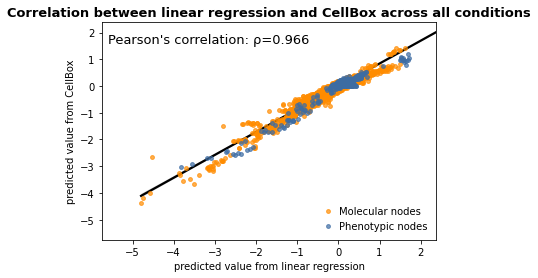

In [7]:
x_all = df2.values.flatten()
y_all = df929.values.flatten()

x_prot = df2.iloc[:,0:82]
y_prot = df929.iloc[:,0:82]
x_pheno = df2.iloc[:,82:87]
y_pheno = df929.iloc[:,82:87]
plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="darkorange",zorder=3)

plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)

plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')

#sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'orange', 'alpha': 1})
sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': 'black', 'alpha': 1})

plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))


lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*0.9])
plt.ylim([lower*1.2, upper*0.9])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 13)
plt.xlabel('predicted value from linear regression')
plt.ylabel('predicted value from CellBox')
plt.title("Correlation between linear regression and CellBox across all conditions", 
          weight='bold', size=13)
